# 라이브러리 호출

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

# MNIST 데이터 불러오기

In [23]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [25]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 0
다음 그림은 숫자 5 입니다.


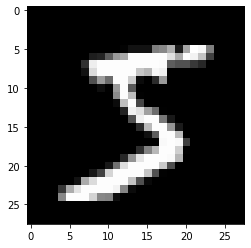

In [24]:
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

# 데이터 전처리

## reshape

In [26]:
print(train_x.shape)

(60000, 28, 28)


In [27]:
train_x_reshape = train_x.reshape([train_x.shape[0],-1])
test_x_reshape = test_x.reshape([test_x.shape[0],-1])

In [28]:
print(train_x_reshape.shape)

(60000, 784)


## Scaling

In [29]:
max_num, min_num = train_x.max(),train_x.min()

train_x = (train_x - min_num) / (max_num - min_num)
test_x = (test_x - min_num) / (max_num - min_num)

max_num, min_num = train_x_reshape.max(),train_x_reshape.min()

train_x_reshape = (train_x_reshape - min_num) / (max_num - min_num)
test_x_reshape = (test_x_reshape - min_num) / (max_num - min_num)


In [30]:
print(f'max:{train_x.max()} / min : {train_x.min()}')
print(f'max:{train_x_reshape.max()} / min : {test_x_reshape.min()}')

max:1.0 / min : 0.0
max:1.0 / min : 0.0


## One hot encoding

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
n_class = len(np.unique(train_y))

train_y = to_categorical(train_y,n_class)
test_y = to_categorical(test_y,n_class)

# 모델링

## reshape 변수 사용

In [41]:
# 레이어 선언
il = keras.layers.Input(shape=(train_x_reshape.shape[1]))
h1 = keras.layers.Dense(512,'relu')(il)
h2 = keras.layers.Dense(512,'relu')(h1)
ol = keras.layers.Dense(n_class,'softmax')(h2)

# 모델 선언
model = keras.models.Model(il,ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True
                  )

In [43]:
train_x_reshape.shape

(60000, 784)

In [58]:
# 모델 학습
model.fit(train_x_reshape,train_y,
          verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0141 - accuracy: 0.9961
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0116 - accuracy: 0.9968
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0114 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0130 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0101 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step -

In [59]:
pred_train = model.predict(train_x_reshape)
pred_test = model.predict(test_x_reshape)

pred_train_argmax = pred_train.argmax(axis=1)
pred_test_argmax = pred_test.argmax(axis=1)

train_accuracy = accuracy_score(train_y.argmax(axis=1),pred_train_argmax)
test_accuracy = accuracy_score(test_y.argmax(axis=1),pred_test_argmax)

print('train data 정확도 : ',train_accuracy*100,'%')
print('test data 정확도 : ',test_accuracy*100,'%')

train data 정확도 :  99.87 %
test data 정확도 :  98.59 %


## Flatten layer

In [60]:
#레이어 선언
shape_size = tuple(train_x.shape[i] for i in range(1,len(train_x.shape)))

il = keras.layers.Input(shape=shape_size)
fl = keras.layers.Flatten()(il)
h1 = keras.layers.Dense(512,'relu')(fl)
ol = keras.layers.Dense(n_class,'softmax')(h1)

#모델 선언
model = keras.models.Model(il,ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [61]:
#모델 학습
model.fit(train_x,train_y,
          verbose=1,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2001 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0816 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0113 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [63]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

pred_train_argmax = pred_train.argmax(axis=1)
pred_test_argmax = pred_test.argmax(axis=1)

train_accuracy = accuracy_score(train_y.argmax(axis=1),pred_train_argmax)
test_accuracy = accuracy_score(test_y.argmax(axis=1),pred_test_argmax)

print('train data 정확도 : ',train_accuracy*100,'%')
print('test data 정확도 : ',test_accuracy*100,'%')

train data 정확도 :  99.75500000000001 %
test data 정확도 :  98.13 %


----
Flatton layer 성질 테스트

In [65]:
il = keras.layers.Input(shape=(10,10,10))
fl = keras.layers.Flatten()(il)
ol = keras.layers.Dense(n_class,'softmax')(fl)

#모델 선언
model = keras.models.Model(il,ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 10, 10, 10)]      0         
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                10010     
                                                                 
Total params: 10,010
Trainable params: 10,010
Non-trainable params: 0
_________________________________________________________________
